In [1]:
import pandas as pd
import numpy as np
import warnings
import xarray as xr
import proplot as plot 
import matplotlib.pyplot as plt 

In [2]:
warnings.filterwarnings('ignore')

maharashtra experienced drought in the year 1972,1973(around 2.5 crore people died) and 2012.As a relatively new drought index, SPEI uses the basis of SPI but includes a temperature component, allowing the index to account for the effect of temperature on drought development through a basic water balance calculation. SPEI has an intensity scale in which both positive and negative values are calculated, identifying wet and dry events. It can be calculated for time steps of as little as 1 month up to 48 months or more. Monthly updates allow it to be used operationally, and the longer the time series of data available, the more robust the results will be.
extremely wet = 2.00 and above
very wet = 1.50 to 1.99
moderately wet = 1.00 to 1.49
near normal = -0.99 to +0.99
moderately dry = -1.00 to -1.49
severely dry = -1.50 to -1.99
extremely dry = -2.00 and less

In [83]:
# dataset is available from https://spei.csic.es/map/maps.html#months=0#month=5#year=2015


spei01 = xr.open_dataset('spei01.nc')# meteorological drought assessments available in netcdf format
spei03 = xr.open_dataset('spei03.nc')# agricultural drought assessments available in netcdf format

In [48]:
spei01

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 841)
Coordinates:
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2020-01-01
Data variables:
    spei     (time, lat, lon) float32 ...

In [49]:
spei03

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 841)
Coordinates:
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2020-01-01
Data variables:
    spei     (time, lat, lon) float32 ...

GLOBAL PLOTTING

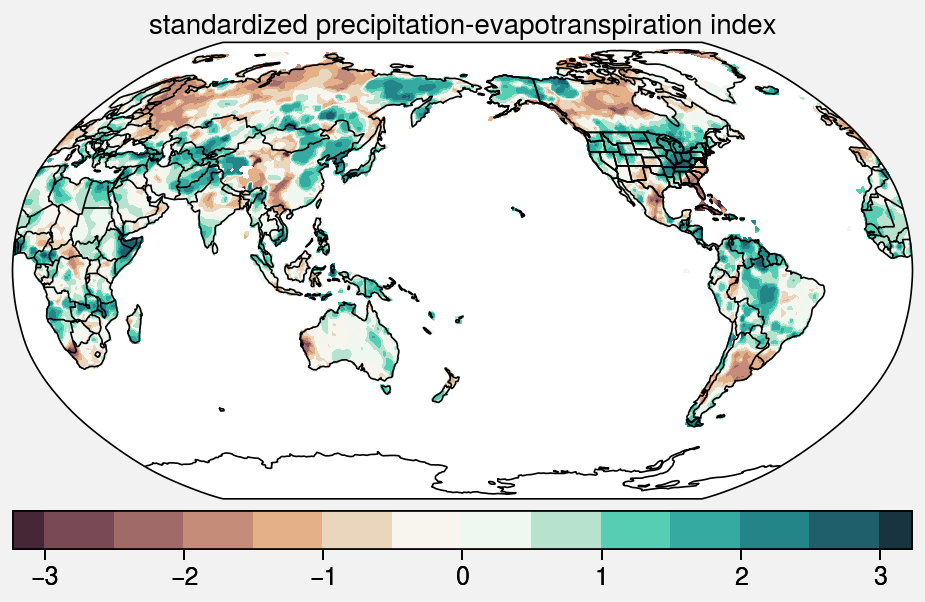

In [50]:
fig, ax = plot.subplots(axwidth=4.5, tight=True,
                        proj='robin', proj_kw={'lon_0': 180},)
# format options
ax.format(land=False, coast=True, innerborders=True, borders=True,
          labels=True, geogridlinewidth=0,)

# first month of the global SPEI-01 data, just for fun.
map1 = ax.contourf(spei01['lon'], spei01['lat'], spei01['spei'][0,:,:],
                   levels = plot.arange(-3, 3, 0.5),
                   cmap='DryWet', extend='both')
ax.colorbar(map1, loc='b', shrink=0.5, extendrect=True)
plt.show()

In [70]:
spei = xr.open_dataset('spei03.nc')# converting netcdf file to xarray


In [52]:
spei = spei.sel(time=slice('1971-01-01', '2018-12-01')) # select time

In [53]:
india1 = spei.sel(lat=slice(5, 37), lon=slice(60, 100), time=slice('1972-01-01', '2018-12-01'))# selecting india

In [54]:
india1

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 40, time: 564)
Coordinates:
  * lon      (lon) float64 60.5 61.5 62.5 63.5 64.5 ... 95.5 96.5 97.5 98.5 99.5
  * lat      (lat) float64 5.5 6.5 7.5 8.5 9.5 10.5 ... 32.5 33.5 34.5 35.5 36.5
  * time     (time) datetime64[ns] 1972-01-01 1972-02-01 ... 2018-12-01
Data variables:
    spei     (time, lat, lon) float32 ...

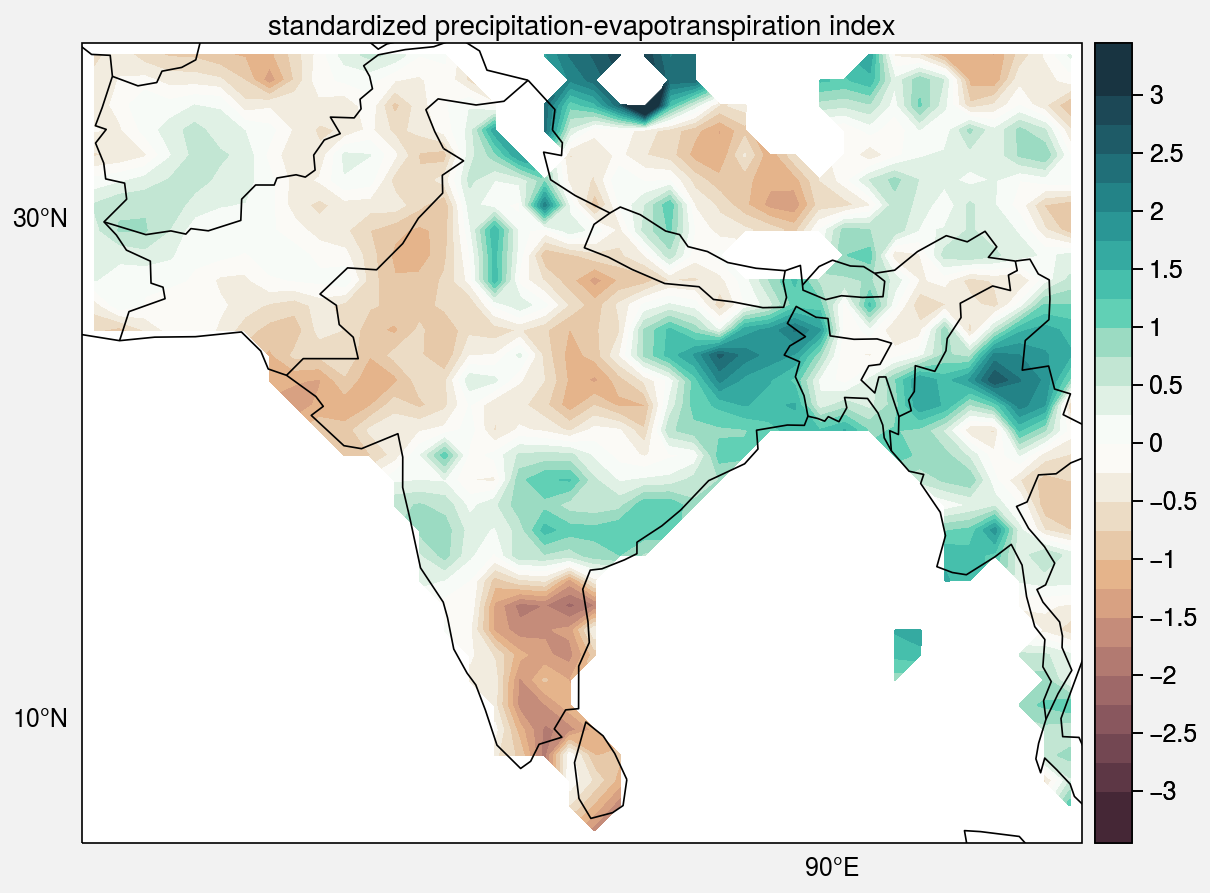

In [55]:
fig, ax = plot.subplots(axwidth= 5, tight=True,
                       proj='pcarree', proj_kw={'lon_0': 0},)
# format options
ax.format(land=False, coast=True, innerborders=True, borders=True,
          latlim=(5, 37), lonlim=(60, 100),
          labels=True, geogridlinewidth=0,)

map1 = ax.contourf(india['lon'], india['lat'],
                   india['spei'][286,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
ax.colorbar(map1, loc='r', shrink=0.5, extendrect=True)
plt.show()

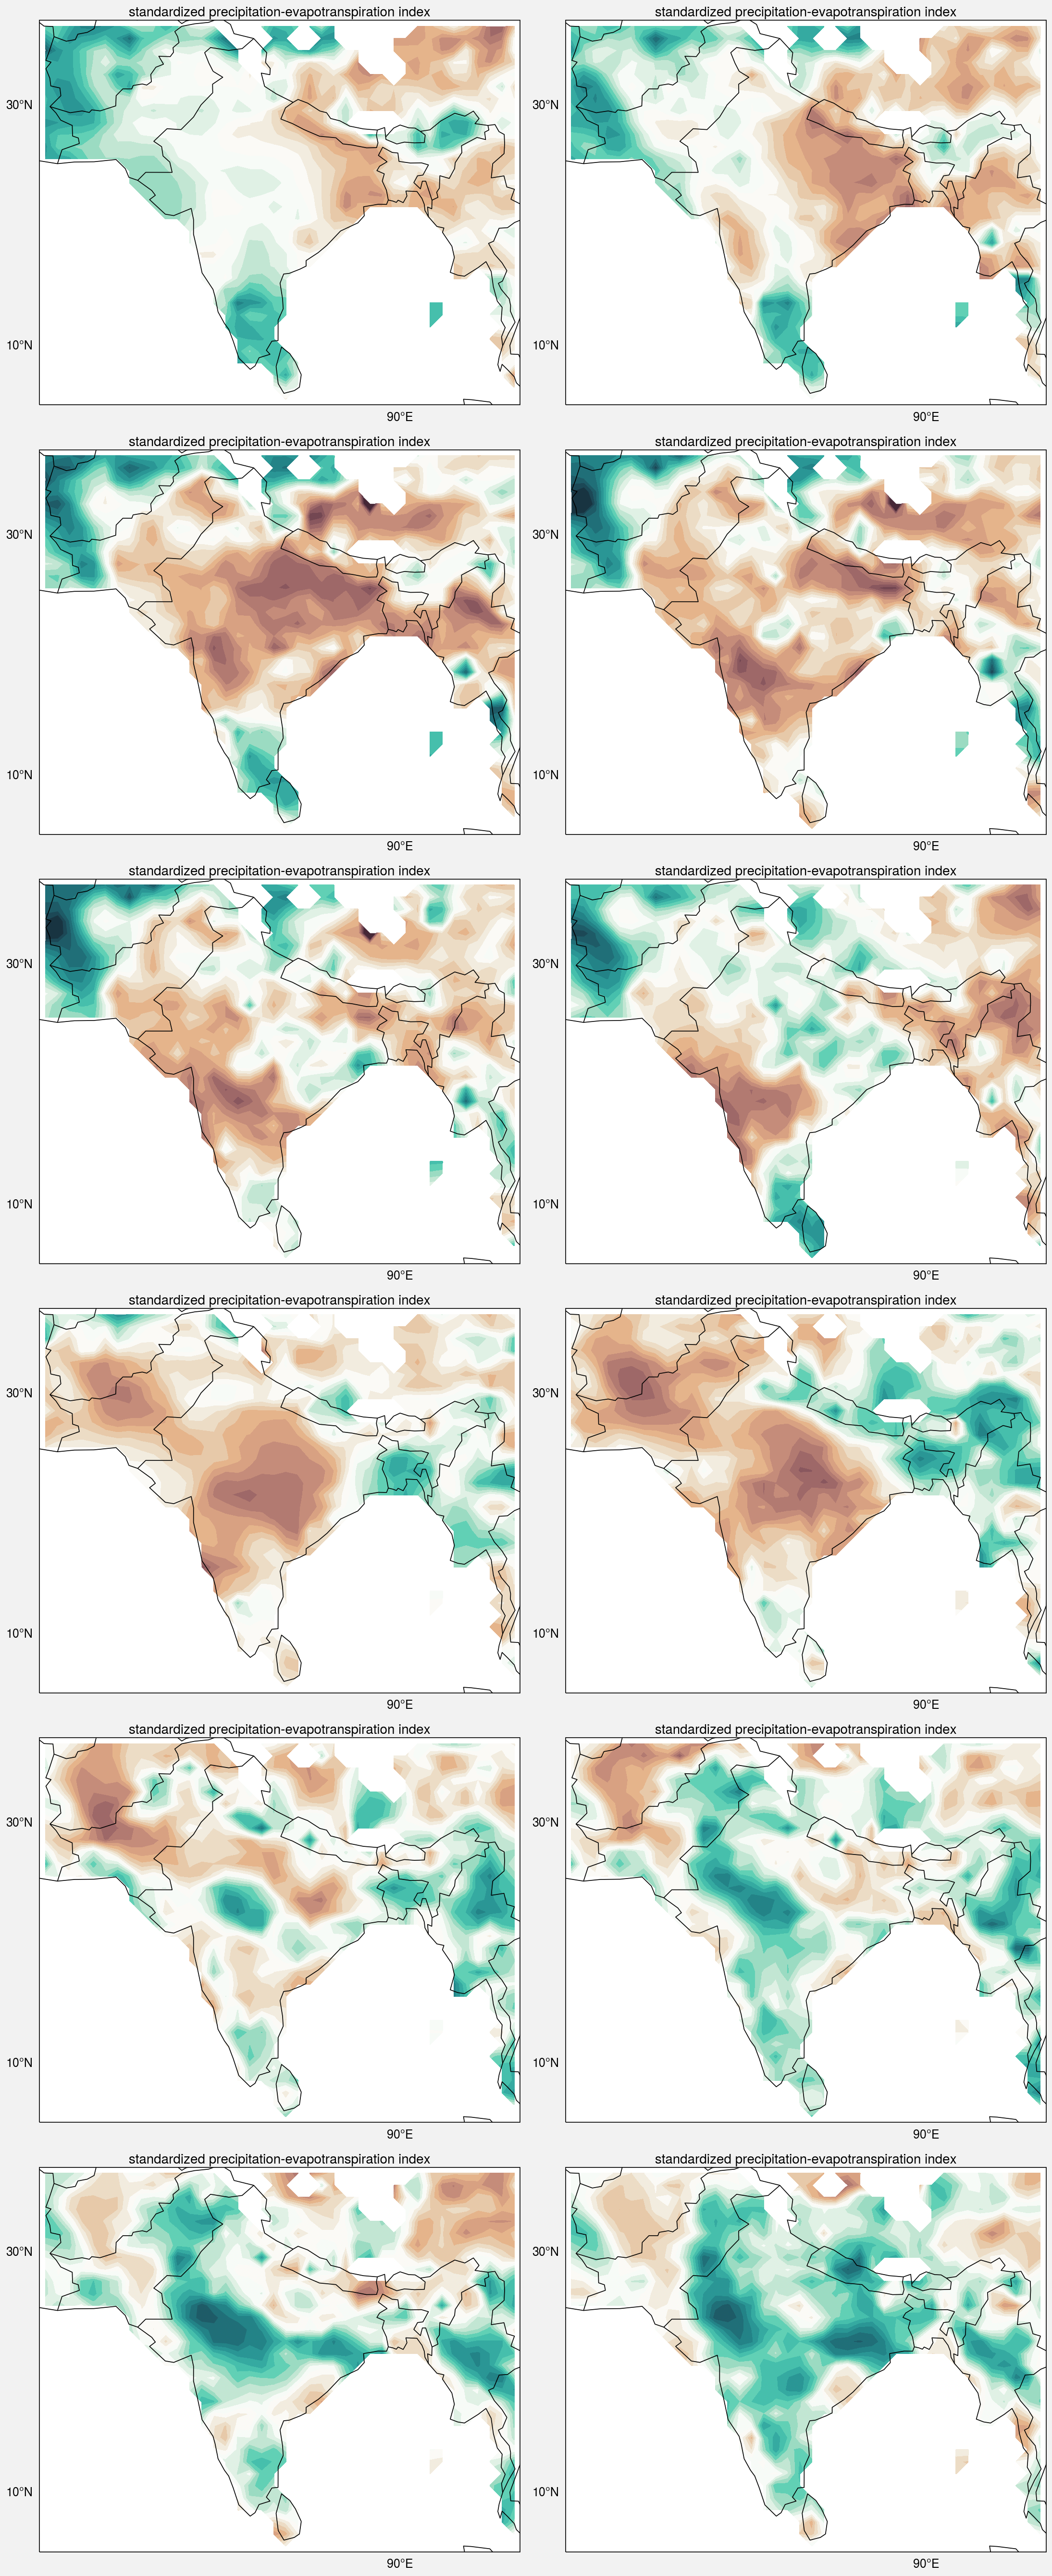

In [71]:
#lets compare the spei value of year 1972 and 1973 . we are taking only months may to oct for study which is kharif season

# format options
fig, ax = plot.subplots(axwidth= 5,nrows=6,ncols = 2, tight=True,
                       proj='pcarree', proj_kw={'lon_0': 0})

ax.format(land=False, coast=True, innerborders=True, borders=True,
          latlim=(5, 37), lonlim=(60, 100),
          labels=True, geogridlinewidth=0,)


map_may72 = ax[0].contourf(india1['lon'], india1['lat'],
                   india1['spei'][4,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_june72 =  ax[1].contourf(india['lon'], india['lat'],
                   india['spei'][5,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_july72 =  ax[2].contourf(india['lon'], india['lat'],
                   india['spei'][6,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_aug72 =  ax[3].contourf(india['lon'], india['lat'],
                   india['spei'][7,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_sep72 =  ax[4].contourf(india['lon'], india['lat'],
                   india['spei'][8,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_oct72 =  ax[5].contourf(india['lon'], india['lat'],
                   india['spei'][9,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_may73 = ax[6].contourf(india1['lon'], india1['lat'],
                   india1['spei'][16,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both', title = 'may2003')
map_june73 =  ax[7].contourf(india['lon'], india['lat'],
                   india['spei'][17,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_july73 =  ax[8].contourf(india['lon'], india['lat'],
                   india['spei'][18,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_aug73 =  ax[9].contourf(india['lon'], india['lat'],
                   india['spei'][19,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_sep73 =  ax[10].contourf(india['lon'], india['lat'],
                   india['spei'][20,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_oct73 =  ax[11].contourf(india['lon'], india['lat'],
                   india['spei'][21,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')

#ax.colorbar(map2, loc='r', shrink=0.5, extendrect=True)
plt.show()

In [72]:
maharashtra = india1.sel(lat=slice(15, 23), lon=slice(72, 81))# selecting maharashtra
maharashtra

<xarray.Dataset>
Dimensions:  (lat: 8, lon: 9, time: 564)
Coordinates:
  * lon      (lon) float64 72.5 73.5 74.5 75.5 76.5 77.5 78.5 79.5 80.5
  * lat      (lat) float64 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5
  * time     (time) datetime64[ns] 1972-01-01 1972-02-01 ... 2018-12-01
Data variables:
    spei     (time, lat, lon) float32 ...

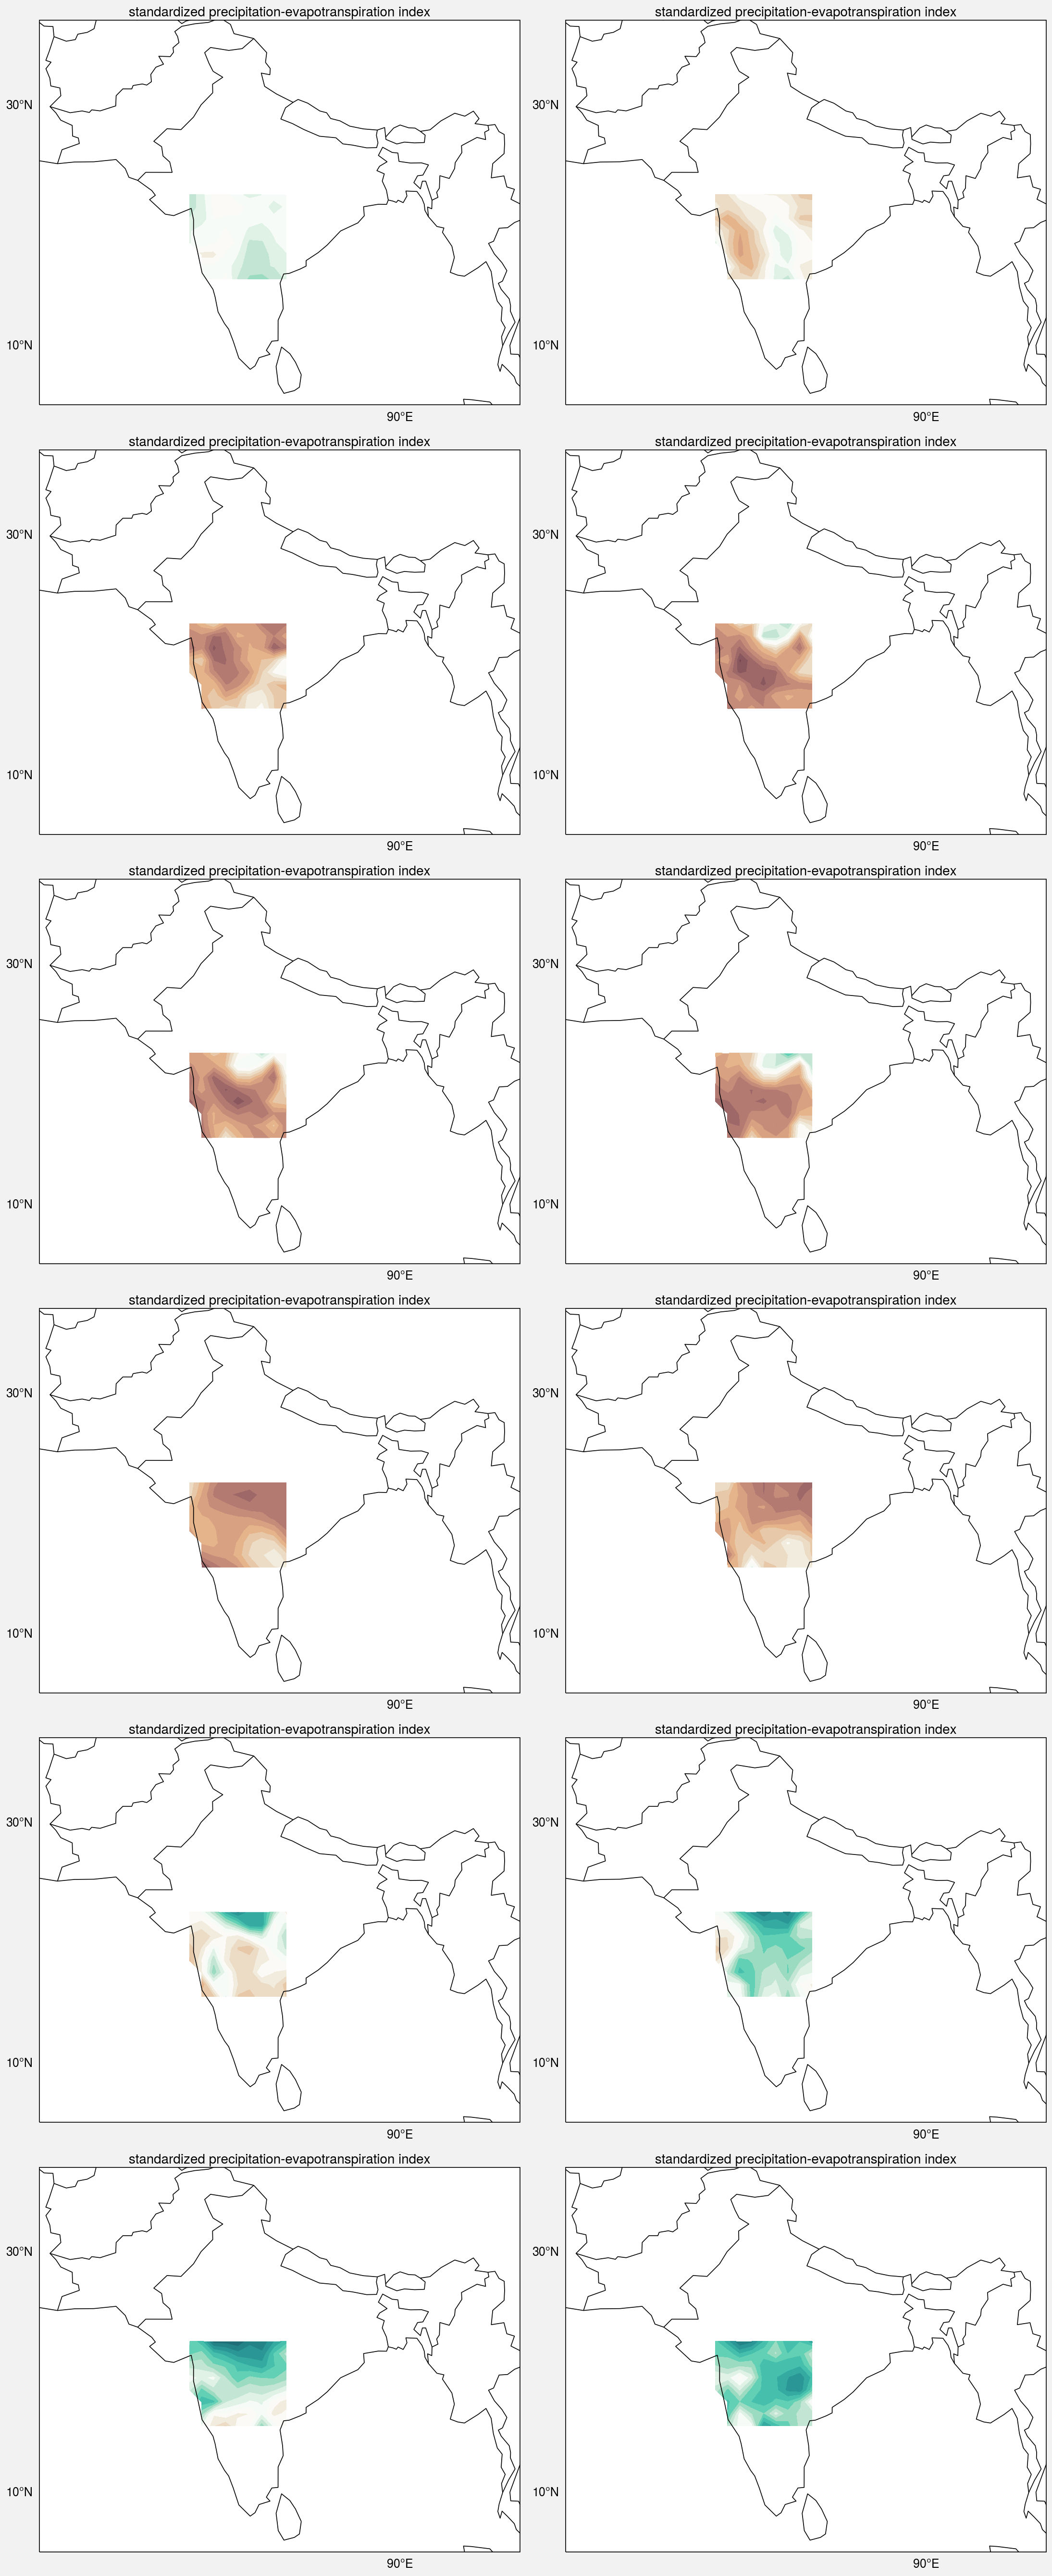

In [73]:
# lets visualize the values of spei in maharashtra
# format options
fig, ax = plot.subplots(axwidth= 5,nrows=6,ncols = 2, tight=True,
                       proj='pcarree', proj_kw={'lon_0': 0})

ax.format(land=False, coast=True, innerborders=True, borders=True,
          latlim=(5, 37), lonlim=(60, 100),
          labels=True, geogridlinewidth=0,)

ax[0].set_title('namaste')
map_may72 = ax[0].contourf(maharashtra['lon'], maharashtra['lat'],
                   maharashtra['spei'][4,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both', title = 'may2002')
map_june72 =  ax[1].contourf(maharashtra['lon'], maharashtra['lat'],
                   maharashtra['spei'][5,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_july72 =  ax[2].contourf(maharashtra['lon'], maharashtra['lat'],
                   maharashtra['spei'][6,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_aug72 =  ax[3].contourf(maharashtra['lon'], maharashtra['lat'],
                   maharashtra['spei'][7,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_sep72 =  ax[4].contourf(maharashtra['lon'], maharashtra['lat'],
                   maharashtra['spei'][8,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_oct72 =  ax[5].contourf(maharashtra['lon'], maharashtra['lat'],
                   maharashtra['spei'][9,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_may73 = ax[6].contourf(maharashtra['lon'], maharashtra['lat'],
                   maharashtra['spei'][16,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both', title = 'may2003')
map_june73 =  ax[7].contourf(maharashtra['lon'], maharashtra['lat'],
                   maharashtra['spei'][17,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_july73 =  ax[8].contourf(maharashtra['lon'], maharashtra['lat'],
                   maharashtra['spei'][18,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_aug73 =  ax[9].contourf(maharashtra['lon'], maharashtra['lat'],
                   maharashtra['spei'][19,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_sep73 =  ax[10].contourf(maharashtra['lon'], maharashtra['lat'],
                   maharashtra['spei'][20,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')
map_oct73 =  ax[11].contourf(maharashtra['lon'], maharashtra['lat'],
                   maharashtra['spei'][21,:,:],
                   levels = plot.arange(-3, 3, 0.25),
                   cmap='DryWet', extend='both')

#ax.colorbar(map2, loc='r', shrink=0.5, extendrect=True)
plt.show()

In [59]:
maharashtra_ts = maharashtra.mean(dim =('lat','lon') )

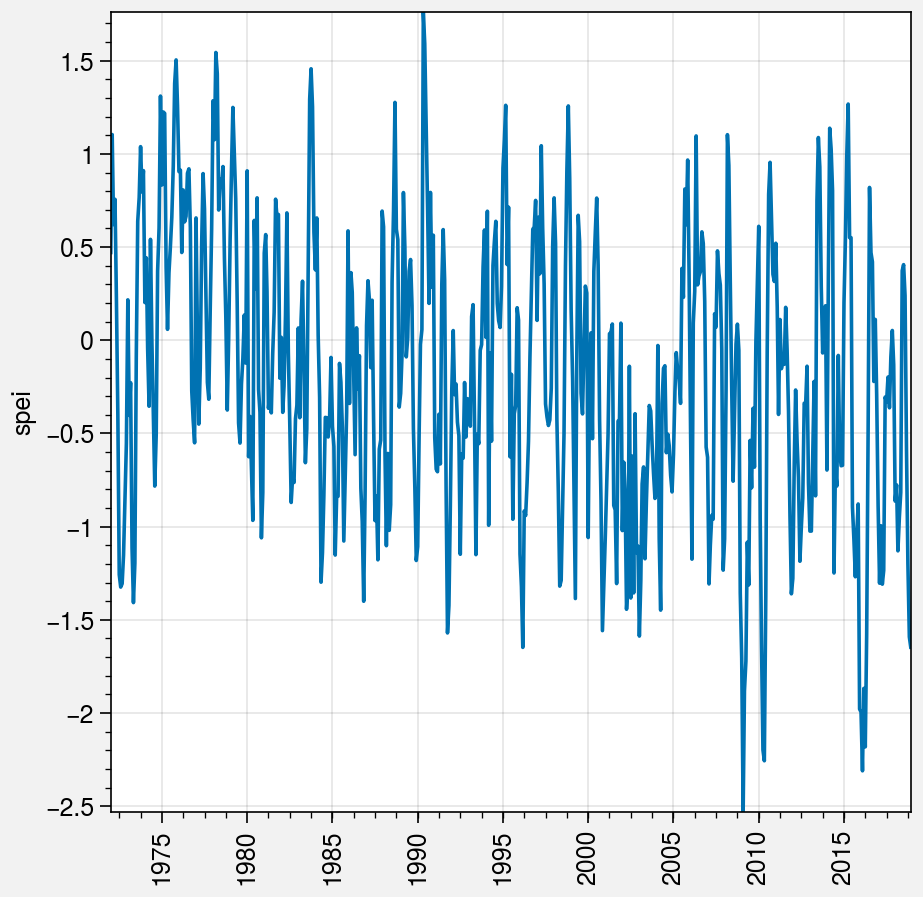

In [60]:
fig, ax = plot.subplots(axwidth= 4, tight=True)

ax.plot(maharashtra_ts['time'], maharashtra_ts['spei'])
plt.show()

In [61]:
time1 = '1972-01-01'
time2 = '1973-12-01'

In [62]:
lastyr_mah_ts = maharashtra_ts.sel(time=slice(time1, time2))

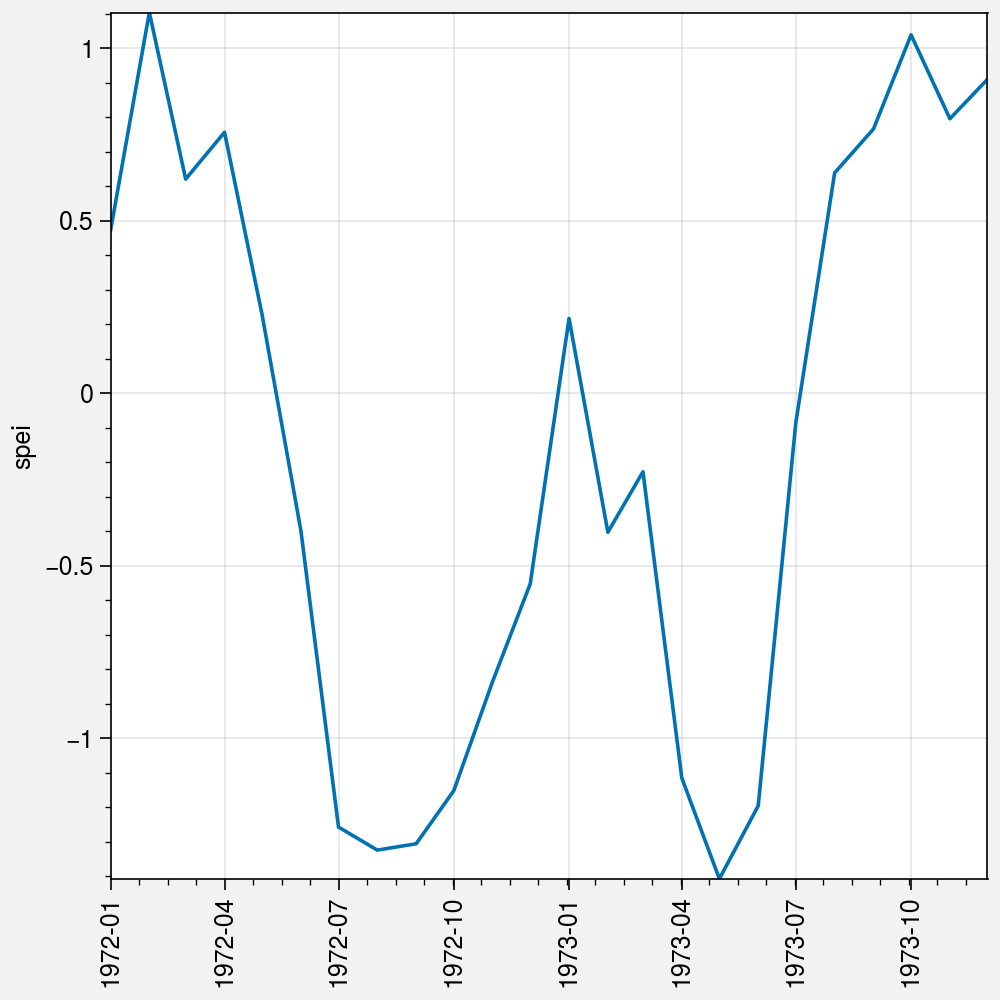

In [63]:
fig, ax = plot.subplots(figsize=(5, 5), tight=True)

ax.plot(lastyr_mah_ts['time'], lastyr_mah_ts['spei'])
plt.show()

In [64]:
time3 = '1973-01-01'
time4 = '1974-12-01'

In [65]:
lastyr_mah_ts2 = maharashtra_ts.sel(time=slice(time3, time4))

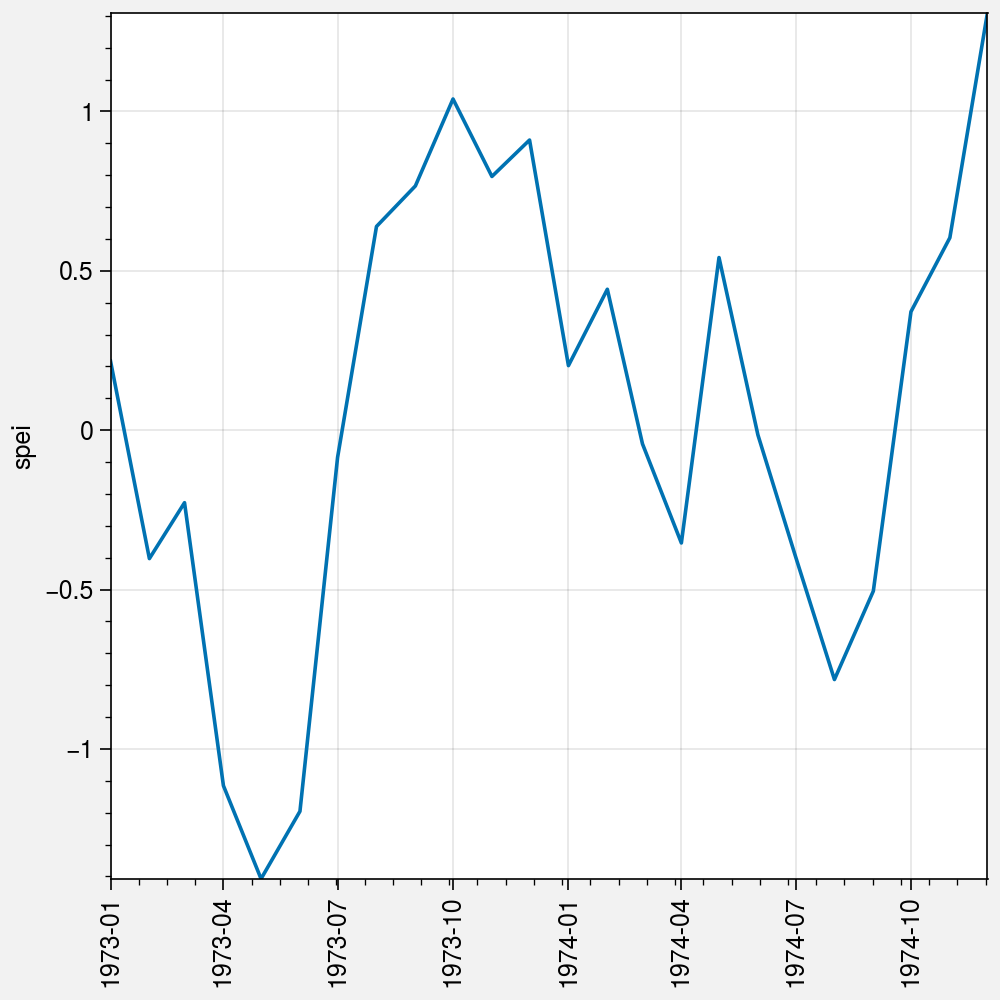

In [66]:
fig, ax = plot.subplots(figsize=(5, 5), tight=True)

ax.plot(lastyr_mah_ts2['time'], lastyr_mah_ts2['spei'])
plt.show()

In [74]:
time5 = '1974-01-01'
time6 = '1975-12-01'

In [75]:
lastyr_mah_ts3 = maharashtra_ts.sel(time=slice(time5, time6))

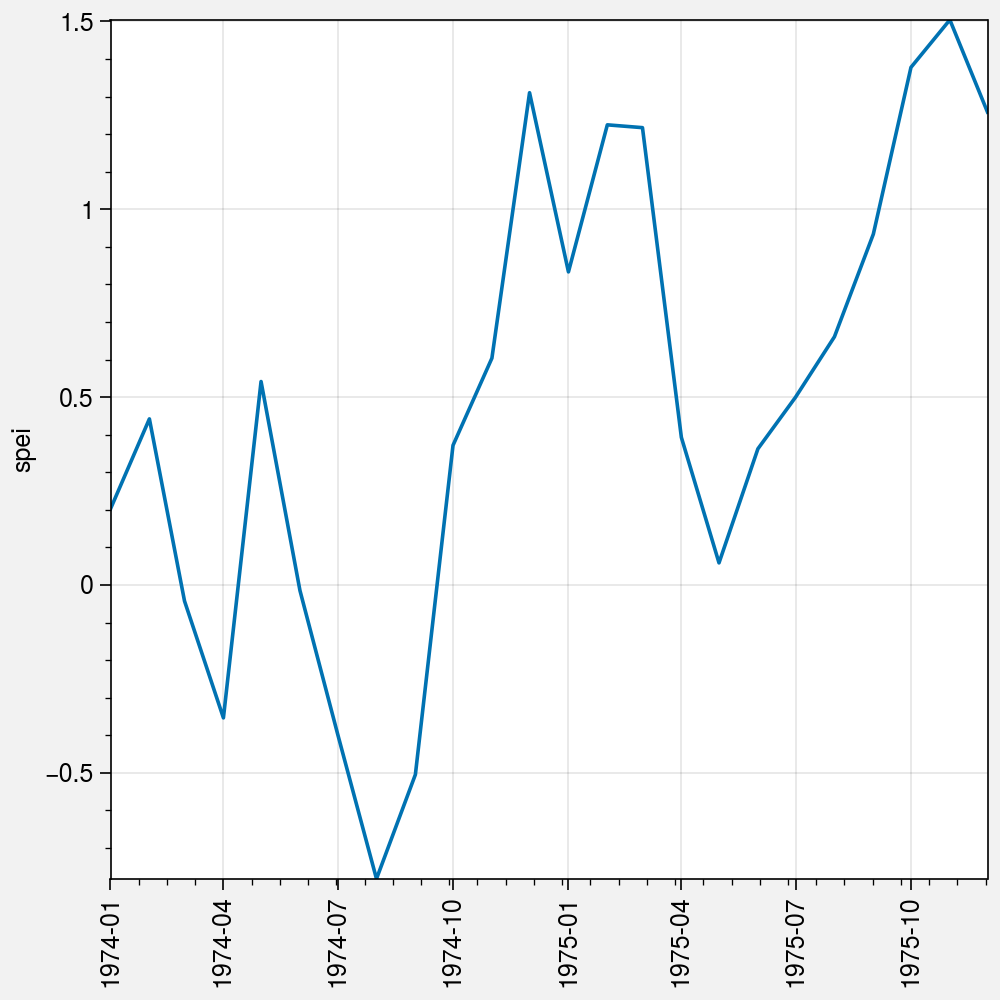

In [76]:
fig, ax = plot.subplots(figsize=(5, 5), tight=True)

ax.plot(lastyr_mah_ts3['time'], lastyr_mah_ts3['spei'])
plt.show()

In [80]:
time7='2012-01-01'
time8='2013-12-01'


In [81]:
lastyr_mah_ts4 = maharashtra_ts.sel(time=slice(time7, time8))

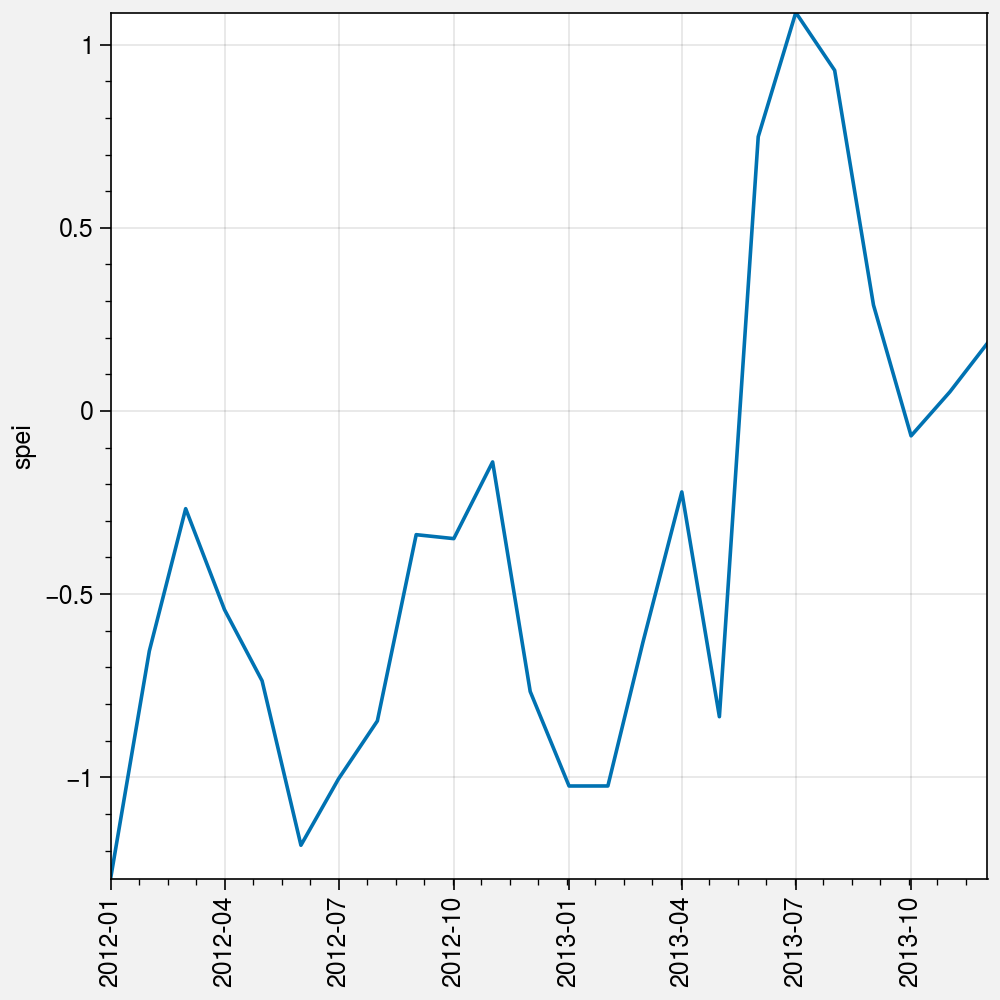

In [82]:
fig, ax = plot.subplots(figsize=(5, 5), tight=True)

ax.plot(lastyr_mah_ts4['time'], lastyr_mah_ts4['spei'])
plt.show()

we can see that  in maharashtra during the year 1972,1973 and 2012 performed poorly in SPEI index.